# 1. Imports and Data Review

In [1]:

import pandas as pd
pd.set_option('display.width',None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', None)
import os
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas.plotting import parallel_coordinates
import numpy as np
# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

#ML imports
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
from sklearn.externals import joblib
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder  


Bad key "text.kerning_factor" on line 4 in
C:\Users\revat\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
C:\Users\revat\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
pdata = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
pdata.shape

(5000, 14)

In [4]:
pdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [5]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
pdata.isnull().values.any()

False

In [7]:
# Count of Each categorical variable 

for column in pdata.select_dtypes(include='object'):
    print(pdata[column].value_counts())
    print()

There are no categorical or object type variables. Some of the columns will have to be converted to categorical variables
That will be done later on

# 2. EDA

## a. Data Distribution

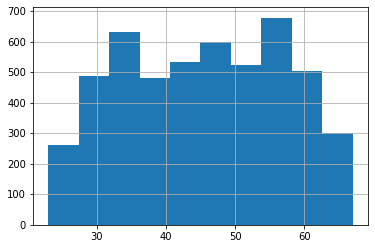

In [8]:
pdata['Age'].hist()

Insight: Most of the population in this dataset seems to be adults between the age of 30 to 60 with the highest count being in their 50s followed by folks in their 30s and 40s. 

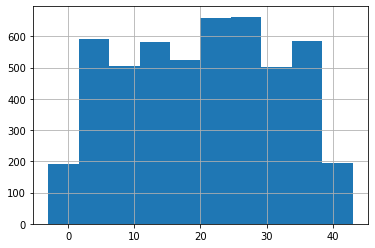

In [9]:
pdata['Experience'].hist()

Insight: Majority of the population in this dataset has experience between 20-30 years. 

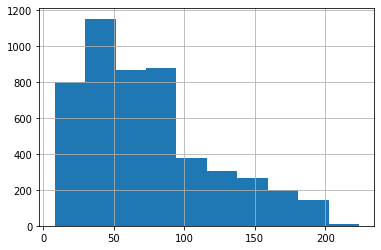

In [10]:
pdata['Income'].hist()

Insight: The distribution is right skewed with majority of the income between $ 0-$100,000

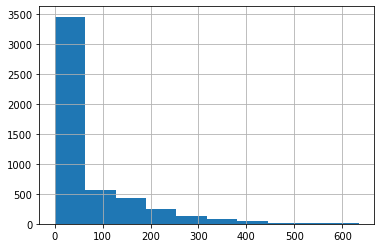

In [11]:
pdata['Mortgage'].hist()

Insight: The distribution is right skewed with majority of the mortage between  0− 100,000

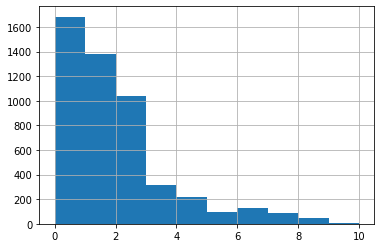

In [12]:
pdata['CCAvg'].hist()

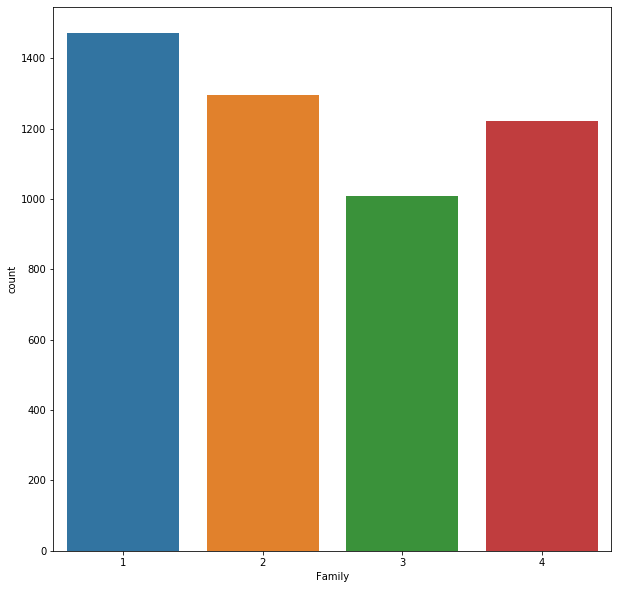

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(x= 'Family', data=pdata)

Most of the participants in this dataset seem to have enlisted family members as just one (themselves)

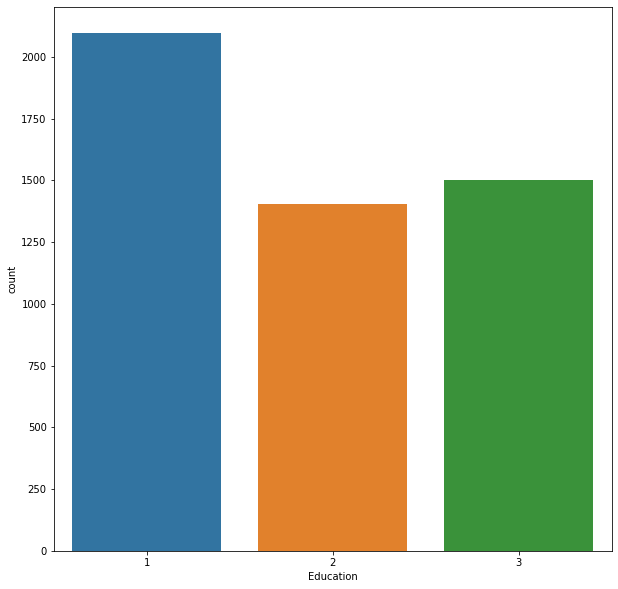

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(x= 'Education', data=pdata)

Most of the participants in this dataset have only an Undergrad education.

## b. Number of unique entries in each column

In [15]:
pdata.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Family, Education, Personal Loan, Securities Account, CD Account, online, CreditCard should all be categorical variables.
While a ZIP Code is numerical, it does not ahave a value (i.e. a higher ZIP Code does not signify anything). Hence it should be converted to categorical as well. 

## c. Number of people with zero mortgage

In [16]:
pdata['Mortgage'].value_counts()

0      3462
98       17
89       16
91       16
83       16
119      16
103      16
90       15
102      15
78       15
131      14
87       14
118      14
104      14
94       14
101      14
81       13
144      13
116      13
112      13
106      13
109      13
185      12
97       12
100      12
121      12
76       12
120      12
84       11
115      11
111      11
158      11
79       11
86       11
137      11
153      11
95       11
184      11
161      10
108      10
113      10
82       10
151      10
117      10
142      10
135      10
166       9
167       9
146       9
221       9
159       9
128       9
123       9
88        9
149       9
148       9
205       8
170       8
207       8
194       8
132       8
169       8
174       8
157       8
147       8
138       8
218       8
75        8
105       8
122       8
140       8
114       8
110       8
164       8
85        7
96        7
124       7
80        7
249       7
230       7
154       7
196       7
204       7
219 

The number of people with zero mortgage is 3462

## d. Number of people with zero credit card spending per month

In [17]:
pdata.groupby(['CCAvg']).size()

CCAvg
0.00     106
0.10     183
0.20     204
0.30     241
0.40     179
0.50     163
0.60     118
0.67      18
0.70     169
0.75       9
0.80     187
0.90     106
1.00     231
1.10      84
1.20      66
1.30     128
1.33       9
1.40     136
1.50     178
1.60     101
1.67      18
1.70     158
1.75       9
1.80     152
1.90     106
2.00     188
2.10     100
2.20     130
2.30      58
2.33      18
2.40      92
2.50     107
2.60      87
2.67      36
2.70      58
2.75       1
2.80     110
2.90      54
3.00      53
3.10      20
3.20      22
3.25       1
3.30      45
3.33       1
3.40      39
3.50      15
3.60      27
3.67       1
3.70      25
3.80      43
3.90      27
4.00      33
4.10      22
4.20      11
4.25       2
4.30      26
4.33       9
4.40      17
4.50      29
4.60      14
4.67       1
4.70      24
4.75       2
4.80       7
4.90      22
5.00      18
5.10       6
5.20      16
5.30       4
5.33       1
5.40      18
5.50       4
5.60       7
5.67       2
5.70      13
5.80       3
5.90  

The number of people with zero credit card spending every month is 106

# e. Value counts of categorical data

In [18]:
columns = ['Family','Education','Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard','ZIP Code']
for column in columns:
    print(column,'\n',pdata[column].value_counts())

Family 
 1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
Education 
 1    2096
3    1501
2    1403
Name: Education, dtype: int64
Personal Loan 
 0    4520
1     480
Name: Personal Loan, dtype: int64
Securities Account 
 0    4478
1     522
Name: Securities Account, dtype: int64
CD Account 
 0    4698
1     302
Name: CD Account, dtype: int64
Online 
 1    2984
0    2016
Name: Online, dtype: int64
CreditCard 
 0    3530
1    1470
Name: CreditCard, dtype: int64
ZIP Code 
 94720    169
94305    127
95616    116
90095     71
93106     57
92037     54
93943     54
91320     53
94025     52
91711     52
92093     51
90024     50
90245     50
91330     46
90089     46
94304     45
92121     45
94143     37
94608     34
95051     34
92182     32
92028     32
92521     32
95054     31
95814     30
95014     29
94550     27
94542     27
94301     27
94501     26
95064     26
95039     26
95819     26
93407     26
94022     25
94105     25
95060     25
94303     25
91107     25


# f. Univariate and Bivariate

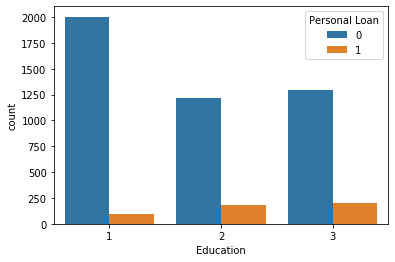

In [19]:
sns.countplot(x='Education', data = pdata, hue=pdata['Personal Loan'])

The higher the education of a person in this dataset, the more likely they are (slighlty) to take a personal loan 

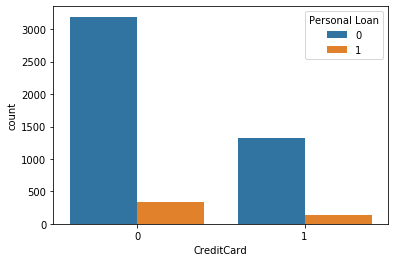

In [20]:
sns.countplot(x='CreditCard', data = pdata, hue=pdata['Personal Loan'])

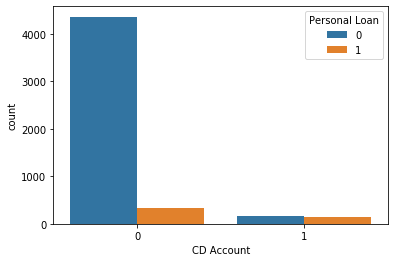

In [21]:
sns.countplot(x='CD Account', data = pdata, hue=pdata['Personal Loan'])

The number of people w/o a credit card and didn't take up the personal loan offer is the highest

In [22]:
n_true = len(pdata.loc[pdata['Personal Loan'] == True])
n_false = len(pdata.loc[pdata['Personal Loan'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


The number of people who did take up the personal loan is ~9.6%

In [23]:
pd.crosstab(pdata['Family'],pdata['Personal Loan'],normalize=True)

Personal Loan,0,1
Family,,
1,0.27,0.02
2,0.24,0.02
3,0.18,0.03
4,0.22,0.03


# g. Getting the data model ready

In [24]:
cat_cols = ['Family','Education','Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'ZIP Code'] 
for column in cat_cols:
    pdata = pdata.astype({column:'category', })
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   category
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(5)
memory usage: 299.2 KB


In [25]:
pdata = pdata.drop(columns =['ID'])
#dropping this variable as it will be 1-1 mapping anyway

In [26]:
pdata.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


C:\Users\revat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


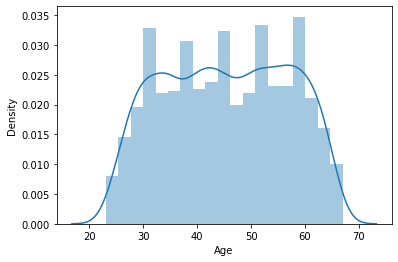

C:\Users\revat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


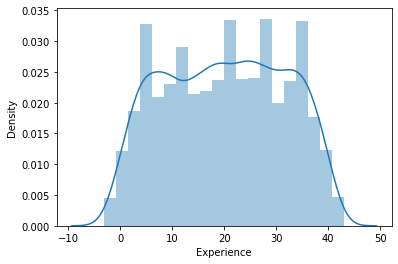

C:\Users\revat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


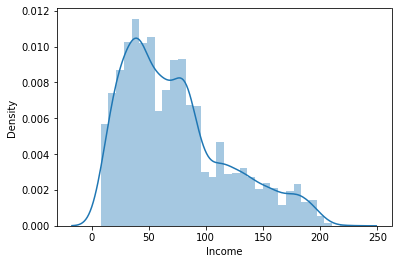

C:\Users\revat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


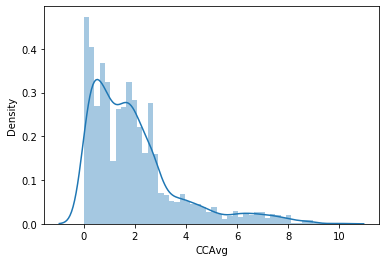

C:\Users\revat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


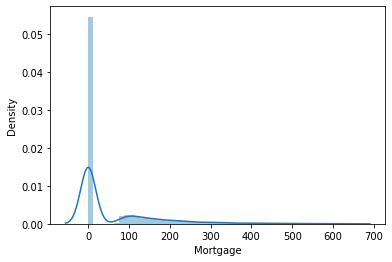

In [27]:
#distplot for continuous columns
for i in ['Age','Experience','Income','CCAvg','Mortgage']:
    sns.distplot(pdata[i])
    plt.show()

In [28]:
pdata['Mortgage'].value_counts(normalize=True)

0     0.69
98    0.00
89    0.00
91    0.00
83    0.00
119   0.00
103   0.00
90    0.00
102   0.00
78    0.00
131   0.00
87    0.00
118   0.00
104   0.00
94    0.00
101   0.00
81    0.00
144   0.00
116   0.00
112   0.00
106   0.00
109   0.00
185   0.00
97    0.00
100   0.00
121   0.00
76    0.00
120   0.00
84    0.00
115   0.00
111   0.00
158   0.00
79    0.00
86    0.00
137   0.00
153   0.00
95    0.00
184   0.00
161   0.00
108   0.00
113   0.00
82    0.00
151   0.00
117   0.00
142   0.00
135   0.00
166   0.00
167   0.00
146   0.00
221   0.00
159   0.00
128   0.00
123   0.00
88    0.00
149   0.00
148   0.00
205   0.00
170   0.00
207   0.00
194   0.00
132   0.00
169   0.00
174   0.00
157   0.00
147   0.00
138   0.00
218   0.00
75    0.00
105   0.00
122   0.00
140   0.00
114   0.00
110   0.00
164   0.00
85    0.00
96    0.00
124   0.00
80    0.00
249   0.00
230   0.00
154   0.00
196   0.00
204   0.00
219   0.00
126   0.00
129   0.00
229   0.00
193   0.00
127   0.00
150   0.00
182   0.00

Insight: For Mortgage, most of the amounts are 0 (69%) and the rest are negligible. So it won't add much value to create dummies of these column

In [29]:
pdata.drop(['Mortgage'], axis=1, inplace=True)

Now the only numerical variables remaining are Age, Experience, Income, and CCAvg. These will have to be binned and converted to categorical. 

In [30]:
pdata.describe()

,Age,Experience,Income,CCAvg
count,"5,000.00","5,000.00","5,000.00","5,000.00"
mean,45.34,20.10,73.77,1.94
std,11.46,11.47,46.03,1.75
min,23.00,-3.00,8.00,0.00
25%,35.00,10.00,39.00,0.70
50%,45.00,20.00,64.00,1.50
75%,55.00,30.00,98.00,2.50
max,67.00,43.00,224.00,10.00


In [31]:
pdata['Age_cut'] = pd.qcut(pdata['Age'], q=4)
pdata['Experience_cut'] = pd.qcut(pdata['Experience'], q=4)
pdata['Income_cut'] = pd.qcut(pdata['Income'], q=4)
pdata['CCAvg_cut'] = pd.qcut(pdata['CCAvg'], q=4)
pdata.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age_cut,Experience_cut,Income_cut,CCAvg_cut
0,25,1,49,91107,4,1.60,1,0,1,0,0,0,"(22.999, 35.0]","(-3.001, 10.0]","(39.0, 64.0]","(1.5, 2.5]"
1,45,19,34,90089,3,1.50,1,0,1,0,0,0,"(35.0, 45.0]","(10.0, 20.0]","(7.999, 39.0]","(0.7, 1.5]"
2,39,15,11,94720,1,1.00,1,0,0,0,0,0,"(35.0, 45.0]","(10.0, 20.0]","(7.999, 39.0]","(0.7, 1.5]"
3,35,9,100,94112,1,2.70,2,0,0,0,0,0,"(22.999, 35.0]","(-3.001, 10.0]","(98.0, 224.0]","(2.5, 10.0]"
4,35,8,45,91330,4,1.00,2,0,0,0,0,1,"(22.999, 35.0]","(-3.001, 10.0]","(39.0, 64.0]","(0.7, 1.5]"


Now we should drop the original columns with continuous variables

In [32]:
pdata = pdata.drop(['Age','Experience','Income', 'CCAvg'], axis=1)

In [33]:
pdata.head()

,ZIP Code,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age_cut,Experience_cut,Income_cut,CCAvg_cut
0,91107,4,1,0,1,0,0,0,"(22.999, 35.0]","(-3.001, 10.0]","(39.0, 64.0]","(1.5, 2.5]"
1,90089,3,1,0,1,0,0,0,"(35.0, 45.0]","(10.0, 20.0]","(7.999, 39.0]","(0.7, 1.5]"
2,94720,1,1,0,0,0,0,0,"(35.0, 45.0]","(10.0, 20.0]","(7.999, 39.0]","(0.7, 1.5]"
3,94112,1,2,0,0,0,0,0,"(22.999, 35.0]","(-3.001, 10.0]","(98.0, 224.0]","(2.5, 10.0]"
4,91330,4,2,0,0,0,0,1,"(22.999, 35.0]","(-3.001, 10.0]","(39.0, 64.0]","(0.7, 1.5]"


In [34]:
# Checking categorical variables' influence on Personal Loan
pd.crosstab(pdata['Family'],pdata['Personal Loan'],normalize='columns')

Personal Loan,0,1
Family,,
1,0.30,0.22
2,0.26,0.22
3,0.19,0.28
4,0.24,0.28


Insight: Number of family members have no relationship with Personal therfore Family is a nominal categorical variable

In [35]:
pd.crosstab(pdata['Education'],pdata['Personal Loan'],normalize='columns')

Personal Loan,0,1
Education,,
1,0.44,0.19
2,0.27,0.38
3,0.29,0.43


Insight: People with lower education seemed to be inclined to not take a personal loan and vice-versa. 

In [36]:
pd.crosstab(pdata['Securities Account'],pdata['Personal Loan'],normalize='columns')

Personal Loan,0,1
Securities Account,,
0,0.90,0.88
1,0.10,0.12


Insight: People who do not have a securities account are also extremely less likely to take a personal loan

In [37]:
pd.crosstab(pdata['CD Account'],pdata['Personal Loan'],normalize='columns')

Personal Loan,0,1
CD Account,,
0,0.96,0.71
1,0.04,0.29


Insight: People who do not have a CD account are also extremely less likely to take a personal loan

In [38]:
pd.crosstab(pdata['Online'],pdata['Personal Loan'],normalize='columns')

Personal Loan,0,1
Online,,
0,0.40,0.39
1,0.60,0.61


Insight: It cannot be said with high certainity whether having an online account will affect the possibility of a person taking loan. 

In [39]:
pd.crosstab(pdata['CreditCard'],pdata['Personal Loan'],normalize='columns')

Personal Loan,0,1
CreditCard,,
0,0.71,0.70
1,0.29,0.30


Insight: People who do not have a CD account are also less likely to take a personal loan

In [40]:
pdata.head()

,ZIP Code,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age_cut,Experience_cut,Income_cut,CCAvg_cut
0,91107,4,1,0,1,0,0,0,"(22.999, 35.0]","(-3.001, 10.0]","(39.0, 64.0]","(1.5, 2.5]"
1,90089,3,1,0,1,0,0,0,"(35.0, 45.0]","(10.0, 20.0]","(7.999, 39.0]","(0.7, 1.5]"
2,94720,1,1,0,0,0,0,0,"(35.0, 45.0]","(10.0, 20.0]","(7.999, 39.0]","(0.7, 1.5]"
3,94112,1,2,0,0,0,0,0,"(22.999, 35.0]","(-3.001, 10.0]","(98.0, 224.0]","(2.5, 10.0]"
4,91330,4,2,0,0,0,0,1,"(22.999, 35.0]","(-3.001, 10.0]","(39.0, 64.0]","(0.7, 1.5]"


In [41]:
X = pdata.drop(columns=['Personal Loan'])
Y = pdata['Personal Loan']

In [42]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,ZIP Code_90005,ZIP Code_90007,ZIP Code_90009,ZIP Code_90011,ZIP Code_90016,ZIP Code_90018,ZIP Code_90019,ZIP Code_90024,ZIP Code_90025,ZIP Code_90027,...,"Age_cut_(55.0, 67.0]","Experience_cut_(10.0, 20.0]","Experience_cut_(20.0, 30.0]","Experience_cut_(30.0, 43.0]","Income_cut_(39.0, 64.0]","Income_cut_(64.0, 98.0]","Income_cut_(98.0, 224.0]","CCAvg_cut_(0.7, 1.5]","CCAvg_cut_(1.5, 2.5]","CCAvg_cut_(2.5, 10.0]"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


# 3. Split the data

In [43]:
#Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

# 4. Use Logistic Regression

In [44]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=4294967295,fit_intercept=False)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4294967295, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [45]:
y_predict = logreg.predict(X_test)              # Predicting the target variable on test data

In [46]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9351428571428572

Testing accuracy 0.9306666666666666

Confusion Matrix


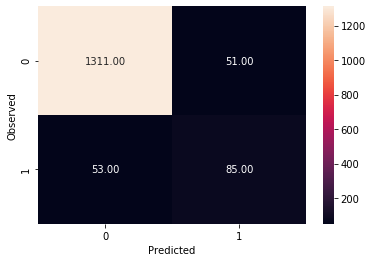

None

Recall: 0.6159420289855072

Precision: 0.625

F1 Score: 0.6204379562043795

Roc Auc Score: 0.7892485475324013


In [47]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

# 5. Coefficiencts of Attributes and Predicted vs Observed

In [48]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
472,CD Account_1,3.80
481,"Income_cut_(39.0, 64.0]",2.90
484,"CCAvg_cut_(0.7, 1.5]",1.92
485,"CCAvg_cut_(1.5, 2.5]",1.83
483,"Income_cut_(98.0, 224.0]",1.71
482,"Income_cut_(64.0, 98.0]",1.60
473,Online_1,1.56
285,ZIP Code_94080,1.51
474,CreditCard_1,1.45
471,Securities Account_1,1.38


In [59]:
# Observe the predicted and observed classes in a dataframe.

d = {'Observed Loan Status':y_test, 'Predicted Loan Status':y_predict}
newdf = pd.DataFrame(data=d)
comparedf = newdf[newdf['Observed Loan Status']==newdf['Predicted Loan Status']]
comparedf.head(30)

,Observed Loan Status,Predicted Loan Status
3406,0,0
757,0,0
3624,0,0
4544,0,0
3235,0,0
1868,0,0
2916,0,0
3527,0,0
2827,0,0
4392,0,0


In [60]:
newdf.count()

Observed Loan Status     1500
Predicted Loan Status    1500
dtype: int64

In [61]:
comparedf.count()

Observed Loan Status     1396
Predicted Loan Status    1396
dtype: int64

In [62]:
100*comparedf.count()/newdf.count()

Observed Loan Status    93.07
Predicted Loan Status   93.07
dtype: float64

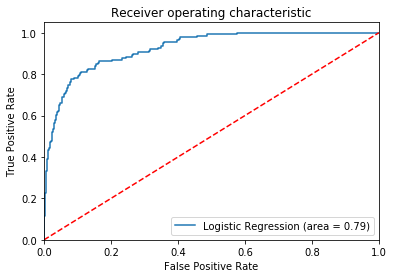

In [63]:

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()